Original Cost Matrix:


,Task 1,Task 2,Task 3
Worker 1,10,9,5
Worker 2,9,8,3
Worker 3,6,4,7



Running Hungarian Algorithm

After row Reduction:


,Task 1,Task 2,Task 3
Worker 1,5,4,0
Worker 2,6,5,0
Worker 3,2,0,3



After column Reduction:


,Task 1,Task 2,Task 3
Worker 1,3,4,0
Worker 2,4,5,0
Worker 3,0,0,3


Number of minimum lines used: 2. It shall be n = 3
Covered rows: [3]
Covered columns: [3]
Not enough lines. Creating more zeros
Uncovered cells [row, column] = value:
[1, 1] = 3, [1, 2] = 4, [2, 1] = 4, [2, 2] = 5
Smallest uncovered value, k = 3 from position(s): [(1, 1)]


Adjustment: Subtract k from uncovered values and add k to double-covered values.


,Task 1,Task 2,Task 3
Worker 1,0,1,0
Worker 2,1,2,0
Worker 3,0,0,6


Number of minimum lines used: 3. It shall be n = 3
Covered rows: [1, 2, 3]
Covered columns: []

Assignments: 
  Worker 2 assigned to task 3 with value 3
  Worker 1 assigned to task 1 with value 10
  Worker 3 assigned to task 2 with value 4

Total minimum value: 17.0

Final Assignment Matrix:


,Task 1,Task 2,Task 3
Worker 1,10.0,0.0,0.0
Worker 2,0.0,0.0,3.0
Worker 3,0.0,4.0,0.0


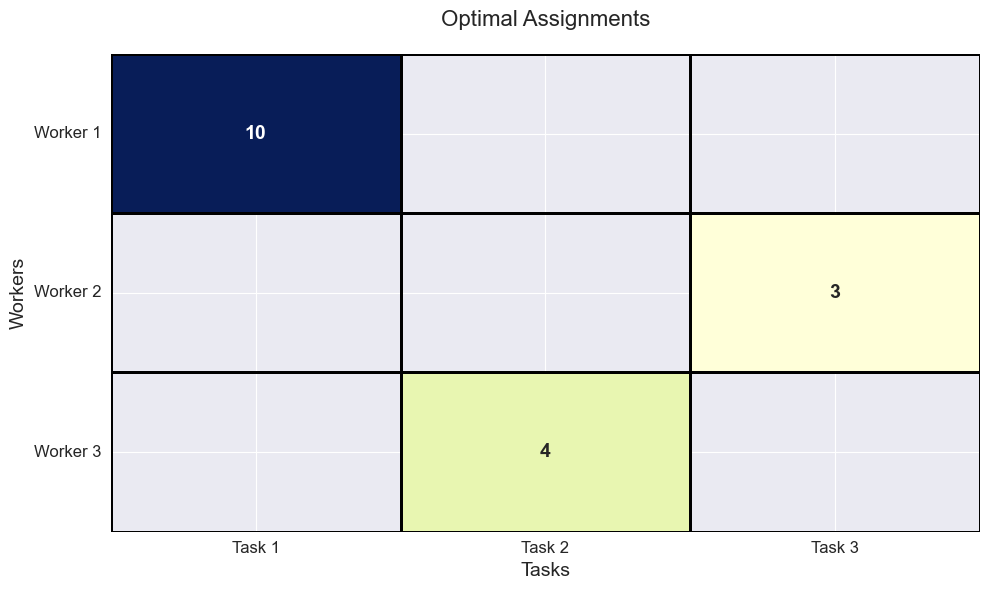


Task Matrix:


,Task 1,Task 2,Task 3,Task 4,Task 5
Worker 1,3,5,5,4,1
Worker 2,2,2,0,2,2
Worker 3,2,4,4,1,0
Worker 4,0,1,1,0,0
Worker 5,1,2,1,3,3



Running Hungarian Algorithm

After row Reduction:


,Task 1,Task 2,Task 3,Task 4,Task 5
Worker 1,2,4,4,3,0
Worker 2,2,2,0,2,2
Worker 3,2,4,4,1,0
Worker 4,0,1,1,0,0
Worker 5,0,1,0,2,2



After column Reduction:


,Task 1,Task 2,Task 3,Task 4,Task 5
Worker 1,2,3,4,3,0
Worker 2,2,1,0,2,2
Worker 3,2,3,4,1,0
Worker 4,0,0,1,0,0
Worker 5,0,0,0,2,2


Number of minimum lines used: 4. It shall be n = 5
Covered rows: [2, 4, 5]
Covered columns: [5]
Not enough lines. Creating more zeros
Uncovered cells [row, column] = value:
[1, 1] = 2, [1, 2] = 3, [1, 3] = 4, [1, 4] = 3, [3, 1] = 2, [3, 2] = 3, [3, 3] = 4, [3, 4] = 1
Smallest uncovered value, k = 1 from position(s): [(3, 4)]


Adjustment: Subtract k from uncovered values and add k to double-covered values.


,Task 1,Task 2,Task 3,Task 4,Task 5
Worker 1,1,2,3,2,0
Worker 2,2,1,0,2,3
Worker 3,1,2,3,0,0
Worker 4,0,0,1,0,1
Worker 5,0,0,0,2,3


Number of minimum lines used: 5. It shall be n = 5
Covered rows: [1, 2, 3, 4, 5]
Covered columns: []

Assignments: 
  Worker 1 assigned to task 5 with value 1
  Worker 2 assigned to task 3 with value 0
  Worker 3 assigned to task 4 with value 1
  Worker 4 assigned to task 1 with value 0
  Worker 5 assigned to task 2 with value 2

Total minimum value: 4.0

Final Assignment Matrix:


,Task 1,Task 2,Task 3,Task 4,Task 5
Worker 1,0.0,0.0,0.0,0.0,1.0
Worker 2,0.0,0.0,0.0,0.0,0.0
Worker 3,0.0,0.0,0.0,1.0,0.0
Worker 4,0.0,0.0,0.0,0.0,0.0
Worker 5,0.0,2.0,0.0,0.0,0.0


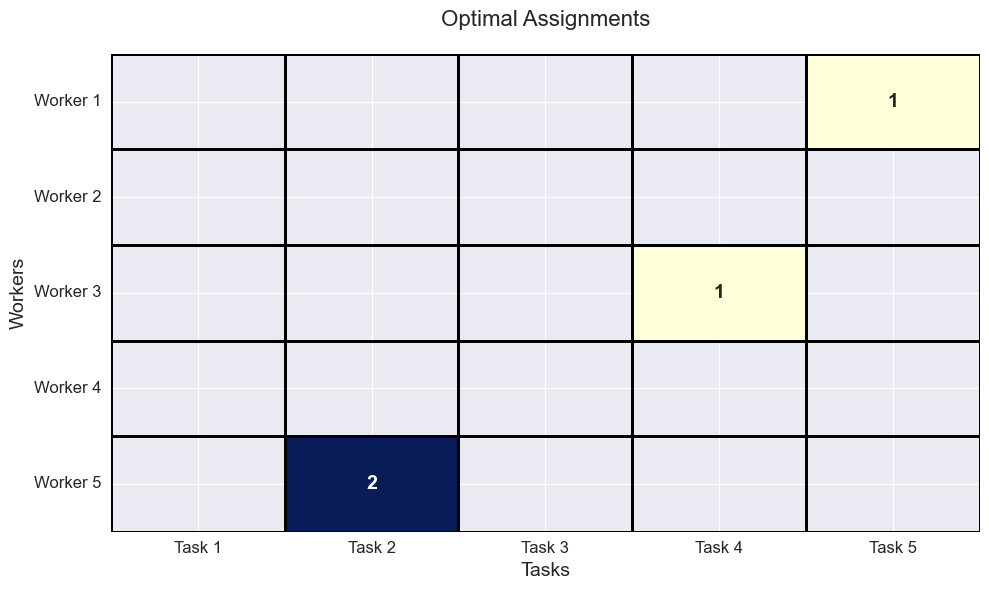

In [3]:
# Cell 1: Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Tuple
from IPython.display import display

# Cell 2: Hungarian Algorithm Implementation with pandas visualization
class HungarianAssignment:
    """
    Implementation of the Hungarian (Munkres) Algorithm for solving the assignment problem.
    This class finds the minimum (or maximum) cost assignment for a square cost matrix.
    The algorithm proceeds in several steps:
    1. Row reduction
    2. Column reduction
    3. Cover all zeros with a minimum number of lines
    4. Adjust the matrix if the minimum number of lines is less than n
    5. Repeat until an optimal assignment is found
    """

    def __init__(self, costMatrix: List[List[float]], isMaximization: bool = False, showReductions: bool = False) -> None:
        """
        Initializes the solver with a square matrix.
        If isMaximization is True, converts a profit matrix to a cost matrix by inversion.
        """
        if not costMatrix or not all(isinstance(row, list) and row for row in costMatrix):
            raise ValueError("Cost matrix must be a non-empty 2D list.")
        row_lengths = {len(row) for row in costMatrix}
        if len(row_lengths) != 1:
            raise ValueError("All rows in the cost matrix must have the same length.")
        if len(costMatrix) != len(costMatrix[0]):
            raise ValueError("Cost matrix must be square (n x n).")

        self.MatrixSize = len(costMatrix)
        self.n = self.MatrixSize
        self.IsMaximization = isMaximization
        self.ShowReductions = showReductions

        # Store original matrix for reporting
        self.OriginalMatrix = [row[:] for row in costMatrix]

        # Convert profit to cost for maximization case
        if self.IsMaximization:
            maximumValue = max(max(row) for row in costMatrix)
            self.CostMatrix = [
                [maximumValue - value for value in row] for row in costMatrix
            ]
            if self.ShowReductions:
                print(f"\nConverted profit matrix to cost matrix (using Maximum = {maximumValue}):")
                self.display_matrix("Cost matrix prepared for minimization:", self.CostMatrix)
        else:
            self.CostMatrix = [row[:] for row in costMatrix]

        # Working matrix for transformations
        self.CurrentMatrix = [row[:] for row in self.CostMatrix]

        # Solution containers
        self.Assignments = []
        self.CoveredRows = [False] * self.n
        self.CoveredColumns = [False] * self.n
        self.TotalValue = 0.0

    def display_matrix(self, title: str, matrix: List[List[float]]) -> None:
        """
        Display matrix as a pandas DataFrame with row and column labels.
        """
        df = pd.DataFrame(matrix)
        df.index = [f'Worker {i+1}' for i in range(len(matrix))]
        df.columns = [f'Task {j+1}' for j in range(len(matrix[0]))]
        print(f"\n{title}")
        display(df)

    def PrintCoverage(self) -> None:
        """Show which rows and columns are currently covered."""
        coveredRowList = [index + 1 for index, flag in enumerate(self.CoveredRows) if flag]
        coveredColumnList = [index + 1 for index, flag in enumerate(self.CoveredColumns) if flag]
        print(f"Covered rows: {coveredRowList}")
        print(f"Covered columns: {coveredColumnList}")

    def RowReduction(self) -> None:
        """
        Step 1: For each row of the matrix, find the smallest element and subtract it from every element in its row.
        """
        for rowIndex in range(self.n):
            rowMinimum = min(self.CurrentMatrix[rowIndex])
            for columnIndex in range(self.n):
                self.CurrentMatrix[rowIndex][columnIndex] -= rowMinimum
        if self.ShowReductions:
            self.display_matrix("After row Reduction:", self.CurrentMatrix)

    def ColumnReduction(self) -> None:
        """
        Step 2: For each column of the matrix, find the smallest element and subtract it from every element in its column.
        """
        for columnIndex in range(self.n):
            columnMinimum = min(self.CurrentMatrix[rowIndex][columnIndex] for rowIndex in range(self.n))
            for rowIndex in range(self.n):
                self.CurrentMatrix[rowIndex][columnIndex] -= columnMinimum
        if self.ShowReductions:
            self.display_matrix("After column Reduction:", self.CurrentMatrix)

    def get_zero_mask(self) -> List[List[bool]]:
        """
        Return a mask indicating the positions of zeros in the current matrix.
        """
        return [[self.CurrentMatrix[i][j] == 0 for j in range(self.n)] for i in range(self.n)]

    def SelectIndependentZeros(self) -> List[Tuple[int, int]]:
        """
        Greedy selection of independent zeros: pick a zero in rows with the fewest zeros first.
        This gives a valid set of independent zeros for building the minimal cover.
        """
        zeroMask = self.get_zero_mask()
        usedRow = [False] * self.n
        usedColumn = [False] * self.n
        picks = []

        while True:
            candidateRow = -1
            candidateZeroCount = None
            for rowIndex in range(self.n):
                if usedRow[rowIndex]:
                    continue
                count = sum(1 for columnIndex in range(self.n)
                            if zeroMask[rowIndex][columnIndex] and not usedColumn[columnIndex])
                if count > 0 and (candidateZeroCount is None or count < candidateZeroCount):
                    candidateZeroCount = count
                    candidateRow = rowIndex
            if candidateRow == -1:
                break
            chosenColumn = None
            for columnIndex in range(self.n):
                if zeroMask[candidateRow][columnIndex] and not usedColumn[columnIndex]:
                    chosenColumn = columnIndex
                    break
            if chosenColumn is None:
                usedRow[candidateRow] = True
                continue
            picks.append((candidateRow, chosenColumn))
            usedRow[candidateRow] = True
            usedColumn[chosenColumn] = True
        return picks

    def BuildMinimalCover(self, picks: List[Tuple[int, int]]) -> Tuple[List[bool], List[bool]]:
        """
        Builds the minimal set of covering lines using the classic marking routine:
        1) Mark all rows that do not contain a pick
        2) While possible:
           - For each marked row, mark every column that has a zero in that row
           - For each pick located in a marked column, mark its row
        3) Covered rows are the unmarked rows, covered columns are the marked columns
        """
        zeroMask = self.get_zero_mask()
        hasPickInRow = [False] * self.n
        for rowIndex, columnIndex in picks:
            hasPickInRow[rowIndex] = True

        markedRow = [not hasPickInRow[rowIndex] for rowIndex in range(self.n)]
        markedColumn = [False] * self.n

        changed = True
        while changed:
            changed = False
            for rowIndex in range(self.n):
                if not markedRow[rowIndex]:
                    continue
                for columnIndex in range(self.n):
                    if zeroMask[rowIndex][columnIndex] and not markedColumn[columnIndex]:
                        markedColumn[columnIndex] = True
                        changed = True
            for rowIndex, columnIndex in picks:
                if markedColumn[columnIndex] and not markedRow[rowIndex]:
                    markedRow[rowIndex] = True
                    changed = True

        coveredRow = [not markedRow[rowIndex] for rowIndex in range(self.n)]
        coveredColumn = [markedColumn[columnIndex] for columnIndex in range(self.n)]
        return coveredRow, coveredColumn

    def CoverZeros(self) -> None:
        """
        Find a set of independent zeros and cover all zeros using a minimum number of lines.
        """
        picks = self.SelectIndependentZeros()
        coveredRow, coveredColumn = self.BuildMinimalCover(picks)
        self.Assignments = picks
        self.CoveredRows = coveredRow
        self.CoveredColumns = coveredColumn

    def AdjustMatrix(self) -> None:
        """
        Find the smallest uncovered value, subtract it from all uncovered elements,
        and add it to all elements covered twice. Print the uncovered cells and adjustment.
        """
        smallestUncovered = None
        uncoveredCells = []
        kPositions = []

        # Scan uncovered cells and track candidates for k
        for rowIndex in range(self.n):
            if self.CoveredRows[rowIndex]:
                continue
            for columnIndex in range(self.n):
                if self.CoveredColumns[columnIndex]:
                    continue
                value = self.CurrentMatrix[rowIndex][columnIndex]
                uncoveredCells.append((rowIndex, columnIndex, value))
                if smallestUncovered is None or value < smallestUncovered:
                    smallestUncovered = value

        if smallestUncovered is None:
            return

        # Identify the exact coordinates where k occurs (use 1-based in printout)
        for rowIndex, columnIndex, value in uncoveredCells:
            if value == smallestUncovered:
                kPositions.append((rowIndex + 1, columnIndex + 1))

        print("Uncovered cells [row, column] = value:")
        if uncoveredCells:
            print(", ".join(f"[{r+1}, {c+1}] = {v}" for r, c, v in uncoveredCells))
        else:
            print("(none)")

        print(f"Smallest uncovered value, k = {smallestUncovered} from position(s): {kPositions}")

        # Apply the standard Hungarian adjustment
        for rowIndex in range(self.n):
            for columnIndex in range(self.n):
                rowIsUncovered = not self.CoveredRows[rowIndex]
                columnIsUncovered = not self.CoveredColumns[columnIndex]
                rowIsCovered = self.CoveredRows[rowIndex]
                columnIsCovered = self.CoveredColumns[columnIndex]

                if rowIsUncovered and columnIsUncovered:
                    self.CurrentMatrix[rowIndex][columnIndex] -= smallestUncovered
                elif rowIsCovered and columnIsCovered:
                    self.CurrentMatrix[rowIndex][columnIndex] += smallestUncovered

        if self.ShowReductions:
            print()
            self.display_matrix("Adjustment: Subtract k from uncovered values and add k to double-covered values.", self.CurrentMatrix)

    def RepeatUntilCovered(self) -> None:
        """
        Repeat the process of covering zeros and adjusting the matrix until an optimal assignment is possible.
        """
        while True:
            self.CoverZeros()
            lineCount = sum(1 for flag in self.CoveredRows if flag) + sum(1 for flag in self.CoveredColumns if flag)

            print(f"Number of minimum lines used: {lineCount}. It shall be n = {self.n}")

            if self.ShowReductions:
                self.PrintCoverage()

            if lineCount >= self.n:
                break

            if self.ShowReductions:
                print("Not enough lines. Creating more zeros")

            self.AdjustMatrix()

    def SelectOptimalAssignment(self) -> None:
        """
        Select the optimal assignment from the zero positions in the matrix.
        """
        zeroMask = self.get_zero_mask()
        usedRow = [False] * self.n
        usedColumn = [False] * self.n
        result = []

        # First, honor the currently selected independent zeros if they remain valid
        for rowIndex, columnIndex in self.Assignments:
            if zeroMask[rowIndex][columnIndex] and not usedRow[rowIndex] and not usedColumn[columnIndex]:
                result.append((rowIndex, columnIndex))
                usedRow[rowIndex] = True
                usedColumn[columnIndex] = True

        # Then, complete the matching by picking any available zero per free row
        for rowIndex in range(self.n):
            if usedRow[rowIndex]:
                continue
            chosenColumn = None
            for columnIndex in range(self.n):
                if zeroMask[rowIndex][columnIndex] and not usedColumn[columnIndex]:
                    chosenColumn = columnIndex
                    break
            if chosenColumn is not None:
                result.append((rowIndex, chosenColumn))
                usedRow[rowIndex] = True
                usedColumn[chosenColumn] = True

        # If still incomplete, fill remaining positions arbitrarily to keep one per row and column
        for rowIndex in range(self.n):
            if usedRow[rowIndex]:
                continue
            for columnIndex in range(self.n):
                if not usedColumn[columnIndex]:
                    result.append((rowIndex, columnIndex))
                    usedRow[rowIndex] = True
                    usedColumn[columnIndex] = True
                    break

        self.Assignments = result
        total = 0.0
        for rowIndex, columnIndex in self.Assignments:
            total += self.OriginalMatrix[rowIndex][columnIndex]
        self.TotalValue = total

    def Solve(self) -> List[List[float]]:
        """
        Runs the six steps and returns ONLY the visual assignment matrix.
        (Note: this matches current usage in RunHungarian; assignments and total are reported via Display.)
        """
        self.RowReduction()
        self.ColumnReduction()
        self.RepeatUntilCovered()
        self.SelectOptimalAssignment()

        assignmentMatrix = [[0.0 for _ in range(self.n)] for _ in range(self.n)]
        for rowIndex, columnIndex in self.Assignments:
            assignmentMatrix[rowIndex][columnIndex] = self.OriginalMatrix[rowIndex][columnIndex]
        return assignmentMatrix

    def Display(self) -> None:
        """
        Display the assignments and total value.
        """
        print("\nAssignments: ")
        for pairIndex, pairValue in enumerate(self.Assignments, start=1):
            rowIndex, columnIndex = pairValue
            print(f"  Worker {rowIndex + 1} assigned to task {columnIndex + 1} with value {self.OriginalMatrix[rowIndex][columnIndex]}")
        print("\nTotal {} value: {}".format("maximum" if self.IsMaximization else "minimum", self.TotalValue))
# Cell 3: Visualization function
def plot_assignment(cost_matrix, assignment_matrix):
    """Create a heatmap visualization of the assignment"""
    plt.figure(figsize=(10, 6))

    # Convert inputs to numpy arrays for easy masking/indexing
    cost_np = np.array(cost_matrix)
    assign_np = np.array(assignment_matrix)

    # Create a mask for seaborn: True means the cell will be hidden.
    # We want to hide non-assigned cells, so mask True where assign_np == 0
    mask = (assign_np == 0)

    # Use annot to show values only for assigned cells; build strings with blanks otherwise
    annot = np.where(assign_np != 0, assign_np.astype(int).astype(str), "")

    ax = sns.heatmap(cost_np,
                     annot=annot,
                     fmt="",
                     cmap="YlGnBu",
                     mask=mask,
                     cbar=False,
                     linewidths=1,
                     linecolor='black',
                     annot_kws={"size": 14, "weight": "bold"})

    plt.title('Optimal Assignments', pad=20, fontsize=16)
    plt.xlabel('Tasks', fontsize=14)
    plt.ylabel('Workers', fontsize=14)

    ax.set_xticklabels([f'Task {i+1}' for i in range(cost_np.shape[1])], fontsize=12)
    ax.set_yticklabels([f'Worker {i+1}' for i in range(cost_np.shape[0])], rotation=0, fontsize=12)

    plt.tight_layout()
    plt.show()

# Cell 4: Example usage
def run_demo():
    # Example cost matrix
    cost_matrix = [
        [10, 9, 5],
        [9, 8, 3],
        [6, 4, 7]
    ]

    print("Original Cost Matrix:")
    display(pd.DataFrame(cost_matrix,
                        index=[f'Worker {i+1}' for i in range(len(cost_matrix))],
                        columns=[f'Task {j+1}' for j in range(len(cost_matrix[0]))]))

    # Create and solve the problem
    print("\nRunning Hungarian Algorithm")
    solver = HungarianAssignment(cost_matrix, isMaximization=False, showReductions=True)
    assignment_matrix = solver.Solve()

    # Display results
    solver.Display()

    print("\nFinal Assignment Matrix:")
    assignment_df = pd.DataFrame(assignment_matrix,
                               index=[f'Worker {i+1}' for i in range(len(assignment_matrix))],
                               columns=[f'Task {j+1}' for j in range(len(assignment_matrix[0]))])
    display(assignment_df)

    # Plot the assignment
    plot_assignment(cost_matrix, assignment_matrix)

# Run the demo
run_demo()

# Cell 5: Try your own matrix
def run_custom_example():
    # Custom cost matrix (5x5 example)
    custom_matrix = [
        [3, 5, 5, 4, 1],
        [2, 2, 0, 2, 2],
        [2, 4, 4, 1, 0],
        [0, 1, 1, 0, 0],
        [1, 2, 1, 3, 3]
    ]

    print("\nTask Matrix:")
    display(pd.DataFrame(custom_matrix,
                        index=[f'Worker {i+1}' for i in range(len(custom_matrix))],
                        columns=[f'Task {j+1}' for j in range(len(custom_matrix[0]))]))

    # Create and solve the problem
    print("\nRunning Hungarian Algorithm")
    solver = HungarianAssignment(custom_matrix, isMaximization=False, showReductions=True)
    assignment_matrix = solver.Solve()

    # Display results
    solver.Display()

    print("\nFinal Assignment Matrix:")
    assignment_df = pd.DataFrame(assignment_matrix,
                               index=[f'Worker {i+1}' for i in range(len(assignment_matrix))],
                               columns=[f'Task {j+1}' for j in range(len(assignment_matrix[0]))])
    display(assignment_df)

    # Plot the assignment
    plot_assignment(custom_matrix, assignment_matrix)

# Uncomment to run the custom example
run_custom_example()